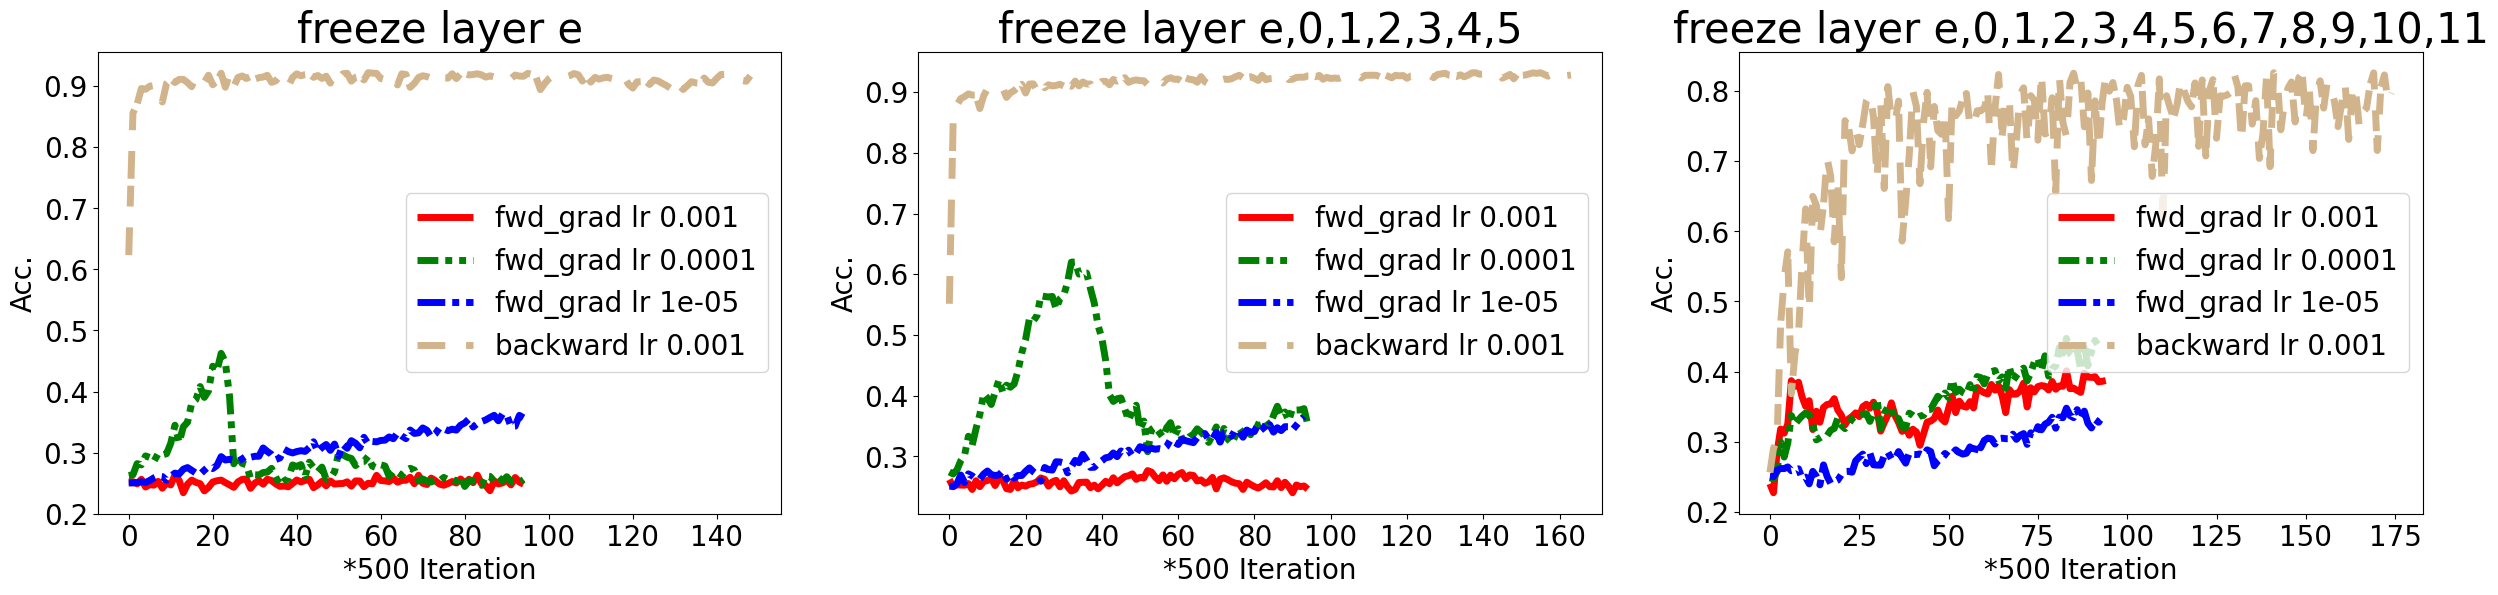

In [3]:
import matplotlib.pyplot as plt
import numpy as np

linestyle = [(0, ( )), (0, (3, 1,1,1,1,1)), (0, (4, 1,1,1)), (0, (1, 1)),(0, (2, 4)), (0, (5, 1)),(0,(3,1,3,1)),(0,(4,3,3,1))]
colors=['r','g','b','y','c','m','k',"tan"] * 100
lw = 5
num_v_list = [1, 2, 5, 10, 20, 50, 100]
model_list = ["vgg16"]
freeze_layers = ["e", "e,0,1,2,3,4,5", "e,0,1,2,3,4,5,6,7,8,9,10,11"]
# normal_method_list = ["kaiming_normal", "xavier_normal"]
learning_rate_list = ["0.001", "0.0001", "1e-05"]
for model in model_list:
    # for method in normal_method_list:
    k = 1
    plt.figure(figsize=(30, 6),dpi=100)
    for layer in freeze_layers:
        plt.subplot(1,3,k)
        k += 1
        acc_lists = []
        for i,lr in enumerate(learning_rate_list):
            acc = []
            with open(f"agnews_forward_lr={lr}_layer={layer}.log","r") as f:
                log = f.readlines()
                for l in log:
                    if "'acc':" in l:
                        acc.append(float(l[l.rfind("'acc':")+7:l.rfind(",")]))
                    # if len(acc)>200:
                    #     break
            plt.plot(range(len(acc)), acc, linestyle=linestyle[i], color=colors[i],label=f"fwd_grad lr {lr}",linewidth=lw)
        with open(f"agnews_backward_lr=0.001_layer={layer}.log","r") as f:
            log = f.readlines()
            acc = []
            for l in log:
                if "'acc':" in l:
                    acc.append(float(l[l.rfind("'acc':")+7:l.rfind(",")]))
                # if len(acc)>200:
                #     break
            plt.plot(range(len(acc)), acc, linestyle=linestyle[-1], color=colors[-1],label=f"backward lr 0.001",linewidth=lw)
        plt.xlabel("*500 Iteration",fontsize=20)
        plt.ylabel("Acc.",fontsize=20)
        plt.xticks(size = 20)
        plt.yticks(size = 20)
        plt.legend(fontsize=20)
        plt.title(f"freeze layer {layer}",fontsize=30)
    plt.show()
        # plt.savefig(f"./{model}_{method}.pdf")
